In [76]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from keras.preprocessing.sequence import pad_sequences

In [77]:
import pandas as pd
import numpy as np
import tensorflow as tf

# 데이터 불러오기

- Human Labeling된 데이터인 SKT , 현대백화점, 현대모비스, S-Oil, 기업은행, 셀트리온 데이터 셋을 이용하여 각 정확도를 올린다.

- 순서
    1. 데이터 불러오기
    2. 데이터 분리
    3. Title 의 토큰화 및 불용어 제거
    4. Label 의 원핫인코딩
    5. 길이가 다른 title의 정형화
    6. LSTM을 통한 딥러닝
    7. 정확도 확인

In [86]:
#df_cj = pd.read_csv('./trainingset/CJ제일제당_traintestdata_3300.csv')

In [88]:
# import sklearn
# from sklearn.utils import shuffle

In [89]:
# df_cj = shuffle(df_cj)

In [91]:
# df_train_cj = df_cj.iloc[:2700]
# df_test_cj = df_cj.iloc[2700:]
# df_train_cj

,Unnamed: 0,Title,Date,Category,label
2306,2306,"CJ제일제당, 농협중앙회와 상생협력 양해각서 체결",2015.03.23,4,1
1144,1144,CJ제일제당 “글로벌 톱 수준 경영 인프라 구축”…세계 1위 목표,2019.07.04,4,1
2066,2066,"햇반 컵반, 제주항공 운항 노선에 판매 개시",2015.12.02,4,0
2031,2031,"새해 결심, 아침밥으로 건강 챙기기",2016.01.10,4,0
893,893,"CJ제일제당, ‘한뿌리 맛있는 건강즙’ 4종 출시",2016.04.27,3,1
...,...,...,...,...,...
2581,2581,"CJ제일제당, 마케팅리서치센터 'Trend전략팀'으로 개편",2014.03.10,4,1
3242,3242,"전남대 동물자원학부, 레드 & 화이트 페스티벌 ‘눈길’",2017.09.28,8,0
2803,2803,‘비비고 가정간편식’으로 든든한 아침식사…체험단에 제품 증정,2018.03.26,5,0
1368,1368,[신년사]손경식 CJ 회장 “압도적 역량을 바탕으로 공격적인 해외사업?M&A 추진”,2018.01.02,4,1


In [97]:
df_skt = pd.read_csv('./trainingset/SKT_traindata_482.csv')
df_train_skt = df_skt.iloc[:200]
df_test_skt = df_skt.iloc[200:]

In [98]:
df_test_skt

,id,Title,label
200,0,"정부, 구글 지도 해외 반출 불허 구글이 보완책 수용 안해 (상보)",0
201,1,"미래부, 2차 유료방송 발전방안 공개토론회 개최",0
202,2,"SKT, 전용폰 구입 고객에 T1 롤드컵 우승 기념품 증정",1
203,3,'갤S7'사면 페이백 50만원 준다더니제2의 거성 모바일 사태?,0
204,4,케이블TV 가입자도 내년 1월부터 SKT 요금할인받는다,1
...,...,...,...
476,78,"스웨덴 에릭슨""4차 산업혁명 협력할 韓 스타트업 찾습니다 ,0\r\n4187,SKT...",1
477,79,"CJ헬로비전 작년 영업이익 59.4% 감소한 429억원…""M&A 등 불확실성 해소,...",1
478,80,SKT 2019년까지 11조원 투자,1
479,81,통신사 커버리지맵 정확도 SKT 1위 '오차 0%',1


In [99]:
df_mobis = pd.read_csv('./trainingset/현대모비스_traindata_200.csv', encoding = 'CP949')
# df_mobis

In [100]:
df_hb = pd.read_csv('./trainingset/현대백화점_traindata_200.csv')
# df_hb

In [101]:
df_S_Oil = pd.read_csv('./trainingset/S-Oil_traindata_200.csv')
df_S_Oil = df_S_Oil.head(200)
# df_S_Oil.head(200)

In [102]:
df_IBK = pd.read_csv('./trainingset/기업은행_traindata_200.csv')
# df_IBK

In [103]:
df_celt = pd.read_csv('./trainingset/셀트리온_traindata_200.csv')
df_celt=df_celt.head(200)
#df_celt

In [104]:
df_KAL = pd.read_csv('./trainingset/대한항공_testdata_300.csv', header=None)
df_celt=df_celt.head(200)
# df_KAL=df_KAL.head(300)
df_KAL=df_KAL.head(299)
df_KAL.columns = ['id','Title','label']
# df_KAL

In [105]:
df = pd.concat([df_train_skt, df_mobis, df_hb, df_S_Oil,df_IBK,df_celt])

In [106]:
df = df[['id','Title','label']]
df

,id,Title,label
0,0.0,국민안전로봇 2021년까지 개발…'로봇물고기' 전철 피할까?,0
1,1.0,'국정원 해킹 의혹' 상임위 앞두고 與野 전초전,0
2,2.0,인터넷티비(TV)결합상품 인터넷가입 비교사이트 통해 통신사별 장단점 비교해야 유리,0
3,3.0,SKT LG KT 인터넷가입 비교사이트 ‘펭귄통신’ 설치 당일 현금지원 이벤트,0
4,4.0,설 연휴 고향 가는 길 언제 출발해야 덜 막힐까,0
...,...,...,...
195,1172.0,"원 이퀴티 파트너스 포, 엘.피., 셀트리온헬스케어 주식 631만주 장내매도",-1
196,1630.0,"코스닥, 장 초반 하락세…640선 또 '위태'",-1
197,696.0,“ 3000% ”터질 바이오 단돈 3천원대! 2019년 마지막 新대장 바이오 온다!,1
198,1563.0,"코스닥, 개인 '사자'에 700 향해 ↑",1


In [107]:
from sklearn.model_selection import train_test_split

## 데이터셋 구성
- Train Dataset : skt 200개, 모비스 200개, 현백 200개, 에쓰오일 200개, 기업은행 200개, 셀트리온 200개
- Test Dataset : skt 282개

In [108]:
# Train 데이터와 Test 데이터 분리
X_train = df['Title']
y_train = df['label']
X_test = df_test_skt['Title']
y_test = df_test_skt['label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [109]:
# 문장을 나누기 위한 Stopwords 선정
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [110]:
#!pip3 install konlpy

In [111]:
# Sentence Tokenizing

import konlpy
from konlpy.tag import Okt

okt = Okt()
X_train_token = []
for sentence in X_train:
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train_token.append(temp_X)

X_test_token = []
for sentence in X_test:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test_token.append(temp_X)

### 단어길이 추출

In [112]:
li_train = []
# li_train.append(1)
# li_train.append(2)
for i in range(len(X_train_token)):
   li_train.append(len(X_train_token[i]))
max(li_train)

li_test = []
# li_train.append(1)
# li_train.append(2)
for i in range(len(X_test_token)):
   li_test.append(len(X_test_token[i]))
max(li_test)


66

### max_words를 35000에서 100으로 줄임(test 길이 중 가장 큰것은 66)

In [113]:
from keras.preprocessing.text import Tokenizer
max_words = 100
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train_token) 
X_train_token = tokenizer.texts_to_sequences(X_train_token) 
X_test_token = tokenizer.texts_to_sequences(X_test_token)

### One-Hot encoding 2가지 방법 - 2번째 방법 사용 (to_categorize)

In [114]:
# 1. 
import numpy as np
y_train_encode = []
y_test_encode = []
for i in range(len(y_train)):
    if y_train.iloc[i] == 1:
        y_train_encode.append([0, 0, 1]) 
    elif y_train.iloc[i] == 0:
        y_train_encode.append([0, 1, 0]) 
    elif y_train.iloc[i] == -1:
        y_train_encode.append([1, 0, 0]) 
        
for i in range(len(y_test)):
    if y_test.iloc[i] == 1:
        y_test_encode.append([0, 0, 1]) 
    elif y_test.iloc[i] == 0:
        y_test_encode.append([0, 1, 0])
    elif y_test.iloc[i] == -1:
        y_test_encode.append([1, 0, 0]) 
        
y_train_encode=np.array(y_train_encode)
y_test_encode=np.array(y_test_encode)

In [115]:
len(y_train_encode)

1022

In [116]:
# 2. 
# to_categorical 방법은 0 1 -1 순서로 인코딩된다!
from keras.utils import to_categorical

y_train_cata = to_categorical(y_train, num_classes = 3)
y_test_cata = to_categorical(y_test, num_classes = 3)

In [117]:
y_train_cata

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

### max_len 20 to 100으로 변경 ; 단어 길이 고려

In [118]:
max_len = 100 # pad_sequesces이용, 전체 데이터의 길이를 20로 맞춘다
X_train = pad_sequences(X_train_token, maxlen=max_len)
X_test = pad_sequences(X_test_token, maxlen=max_len)

### 모델 저장1
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


MODEL_DIR = './ModelCheckpoint/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
mdpath = './ModelCheckpoint/{epoch:02d}-{val_loss:.4f}.hdf5'
mc = ModelCheckpoint(filepath=mdpath,monitor='val_acc',mode='max',verbose=1,save_best_only=True)
es = EarlyStopping(monitor='val_loss',patience=10,mode='min',verbose=1)

model = Sequential()
model.add(Embedding(max_words, 64))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_cata, epochs=10, batch_size=10, callbacks=[es,mc], validation_split=0.1)

### 모델 저장2
from keras.models import load_model
##### 모델 컴퓨터에 저장
model.save('모델이름')
##### 모델 불러오기
del model # 테스트를 위해 메모리 내의 모델을 삭제
model = load_model('모델명')

### LSTM 모델

### earlystopping과 modelcheckpoint 추가
### embedding 64로 변경

In [119]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
mc = ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max',verbose=1,save_best_only=True)

model = Sequential()
model.add(Embedding(max_words, 64))
model.add(LSTM(128,activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_cata, epochs=20, batch_size=10, callbacks=[es,mc], validation_split=0.1)

Epoch 1/20
110/110 [==============================] - 6s 59ms/step - loss: 1.0042 - accuracy: 0.5259 - val_loss: 1.0193 - val_accuracy: 0.5447
Epoch 2/20
110/110 [==============================] - 6s 56ms/step - loss: 0.8914 - accuracy: 0.5732 - val_loss: 0.7887 - val_accuracy: 0.6748
Epoch 3/20
110/110 [==============================] - 6s 55ms/step - loss: 0.8469 - accuracy: 0.5987 - val_loss: 0.7311 - val_accuracy: 0.7561
Epoch 4/20
110/110 [==============================] - 6s 56ms/step - loss: 0.8202 - accuracy: 0.6178 - val_loss: 0.7859 - val_accuracy: 0.6911
Epoch 5/20
110/110 [==============================] - 6s 56ms/step - loss: 0.8236 - accuracy: 0.6233 - val_loss: 0.6978 - val_accuracy: 0.7317
Epoch 6/20
110/110 [==============================] - 6s 56ms/step - loss: 0.7927 - accuracy: 0.6187 - val_loss: 0.7169 - val_accuracy: 0.6911
Epoch 7/20
110/110 [==============================] - 6s 57ms/step - loss: 0.7776 - accuracy: 0.6379 - val_loss: 0.7521 - val_accuracy: 0.6829

In [74]:
print("\n 테스트 정확도 : {:.2f}%".format(model.evaluate(X_test,y_test_cata)[1]*100))

9/9 [==============================] - 0s 17ms/step - loss: 0.9734 - accuracy: 0.5872

 테스트 정확도 : 58.72%


In [34]:
model.save('M1_61.21%')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: M1_61.21%\assets


## KFOLD 검증

In [78]:
#seed 값 설정
seed = 1
np.random.seed(seed)
#tf.set_random_seed(seed)

In [79]:
X=X_train
Y=y_train_cata

In [80]:
#10개의 파일로 쪼갬
n_fold = 15

In [81]:
skf =KFold(n_splits=n_fold, shuffle=True,random_state=seed)

In [82]:
#빈 accuracy 배열
accuracy =[]

In [84]:
#모델의 설정, 컴파일, 실행
for train, test in skf.split(X,Y):
    from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
    es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=4)
    mc = ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max',verbose=1,save_best_only=True)

    model = Sequential()
    model.add(Embedding(max_words, 64))
    model.add(LSTM(128,activation='tanh'))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X[train],Y[train], epochs=10, batch_size=10, callbacks=[es,mc], validation_split=0.1)
    k_accuracy = '%.4f'%(model.evaluate(X[test],Y[test])[1])
    accuracy.append(k_accuracy)

Epoch 1/10
103/103 [==============================] - 5s 50ms/step - loss: 1.0034 - accuracy: 0.5253 - val_loss: 0.9877 - val_accuracy: 0.5439
Epoch 2/10
103/103 [==============================] - 5s 45ms/step - loss: 0.9308 - accuracy: 0.5828 - val_loss: 0.7731 - val_accuracy: 0.7105
Epoch 3/10
103/103 [==============================] - 5s 45ms/step - loss: 0.8479 - accuracy: 0.6072 - val_loss: 0.7933 - val_accuracy: 0.7281
Epoch 4/10
103/103 [==============================] - 5s 45ms/step - loss: 0.8140 - accuracy: 0.6170 - val_loss: 0.7442 - val_accuracy: 0.7193
Epoch 5/10
103/103 [==============================] - 5s 45ms/step - loss: 0.7925 - accuracy: 0.6140 - val_loss: 0.7682 - val_accuracy: 0.6930
Epoch 6/10
103/103 [==============================] - 5s 45ms/step - loss: 0.7822 - accuracy: 0.6248 - val_loss: 0.7500 - val_accuracy: 0.6930
Epoch 7/10
103/103 [==============================] - 5s 45ms/step - loss: 0.7663 - accuracy: 0.6384 - val_loss: 0.8206 - val_accuracy: 0.6667

Epoch 4/10
103/103 [==============================] - 6s 56ms/step - loss: 0.8074 - accuracy: 0.6160 - val_loss: 0.7603 - val_accuracy: 0.7105
Epoch 5/10
103/103 [==============================] - 6s 55ms/step - loss: 0.7865 - accuracy: 0.6257 - val_loss: 0.7794 - val_accuracy: 0.6930
Epoch 6/10
103/103 [==============================] - 6s 55ms/step - loss: 0.7737 - accuracy: 0.6404 - val_loss: 0.8266 - val_accuracy: 0.7018
Epoch 7/10
103/103 [==============================] - 6s 54ms/step - loss: 0.7617 - accuracy: 0.6433 - val_loss: 0.8009 - val_accuracy: 0.7018
Epoch 8/10
103/103 [==============================] - 6s 54ms/step - loss: 0.7571 - accuracy: 0.6452 - val_loss: 0.8409 - val_accuracy: 0.6579
Epoch 00008: early stopping
3/3 [==============================] - 0s 12ms/step - loss: 0.9072 - accuracy: 0.5610
Epoch 1/10
103/103 [==============================] - 5s 52ms/step - loss: 1.0028 - accuracy: 0.5292 - val_loss: 0.9903 - val_accuracy: 0.5614
Epoch 2/10
103/103 [========

Epoch 8/10
103/103 [==============================] - 7s 67ms/step - loss: 0.7404 - accuracy: 0.6394 - val_loss: 0.8264 - val_accuracy: 0.6667
Epoch 9/10
103/103 [==============================] - 7s 67ms/step - loss: 0.7324 - accuracy: 0.6686 - val_loss: 0.8056 - val_accuracy: 0.6842
Epoch 00009: early stopping
3/3 [==============================] - 0s 13ms/step - loss: 0.9027 - accuracy: 0.5488
Epoch 1/10
103/103 [==============================] - 6s 61ms/step - loss: 1.0142 - accuracy: 0.5341 - val_loss: 0.9939 - val_accuracy: 0.5304
Epoch 2/10
103/103 [==============================] - 6s 57ms/step - loss: 0.9069 - accuracy: 0.5556 - val_loss: 0.8102 - val_accuracy: 0.7304
Epoch 3/10
103/103 [==============================] - 6s 57ms/step - loss: 0.8412 - accuracy: 0.5955 - val_loss: 0.7479 - val_accuracy: 0.6609
Epoch 4/10
103/103 [==============================] - 6s 57ms/step - loss: 0.8065 - accuracy: 0.6248 - val_loss: 0.7515 - val_accuracy: 0.6870
Epoch 5/10
103/103 [========

Epoch 5/10
103/103 [==============================] - 6s 59ms/step - loss: 0.7827 - accuracy: 0.6365 - val_loss: 0.7314 - val_accuracy: 0.7217
Epoch 6/10
103/103 [==============================] - 6s 59ms/step - loss: 0.7905 - accuracy: 0.6394 - val_loss: 0.8992 - val_accuracy: 0.5478
Epoch 7/10
103/103 [==============================] - 6s 59ms/step - loss: 0.7934 - accuracy: 0.6218 - val_loss: 0.7652 - val_accuracy: 0.6696
Epoch 8/10
103/103 [==============================] - 6s 60ms/step - loss: 0.7446 - accuracy: 0.6559 - val_loss: 0.7676 - val_accuracy: 0.7043
Epoch 9/10
103/103 [==============================] - 6s 60ms/step - loss: 0.7324 - accuracy: 0.6618 - val_loss: 0.8271 - val_accuracy: 0.6609
Epoch 00009: early stopping
3/3 [==============================] - 0s 13ms/step - loss: 0.9885 - accuracy: 0.5926
Epoch 1/10
103/103 [==============================] - 6s 61ms/step - loss: 1.0028 - accuracy: 0.5263 - val_loss: 0.9828 - val_accuracy: 0.5391
Epoch 2/10
103/103 [========

Epoch 8/10
103/103 [==============================] - 6s 63ms/step - loss: 0.7409 - accuracy: 0.6481 - val_loss: 0.8573 - val_accuracy: 0.6435
Epoch 9/10
103/103 [==============================] - 6s 62ms/step - loss: 0.7314 - accuracy: 0.6452 - val_loss: 0.8596 - val_accuracy: 0.6435
Epoch 00009: early stopping
3/3 [==============================] - 0s 14ms/step - loss: 0.8672 - accuracy: 0.6420
Epoch 1/10
103/103 [==============================] - 6s 63ms/step - loss: 1.0031 - accuracy: 0.5302 - val_loss: 0.9898 - val_accuracy: 0.5826
Epoch 2/10
103/103 [==============================] - 6s 61ms/step - loss: 0.9033 - accuracy: 0.5702 - val_loss: 0.7544 - val_accuracy: 0.7217
Epoch 3/10
103/103 [==============================] - 6s 60ms/step - loss: 0.8485 - accuracy: 0.5877 - val_loss: 0.7119 - val_accuracy: 0.7043
Epoch 4/10
103/103 [==============================] - 6s 60ms/step - loss: 0.8148 - accuracy: 0.6062 - val_loss: 0.7884 - val_accuracy: 0.6696
Epoch 5/10
103/103 [========

In [85]:
print("\n 테스트 정확도 : {:.2f}%".format(model.evaluate(X_test,y_test_cata)[1]*100))

9/9 [==============================] - 0s 19ms/step - loss: 0.9478 - accuracy: 0.5836

 테스트 정확도 : 58.36%


## Learning Rate 조정

In [41]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import SGD, RMSprop, Adagrad, Adam

In [45]:
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
mc = ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max',verbose=1,save_best_only=True)
opt =Adam()

model = Sequential()
model.add(Embedding(max_words, 64))
model.add(LSTM(128,activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_cata, epochs=20, batch_size=10, callbacks=[es,mc], validation_split=0.1)
    
print("\n 테스트 정확도 : {:.2f}%".format(model.evaluate(X_test,y_test_cata)[1]*100))

Epoch 1/20
110/110 [==============================] - 5s 46ms/step - loss: 1.0040 - accuracy: 0.5305 - val_loss: 0.9662 - val_accuracy: 0.5528
Epoch 2/20
110/110 [==============================] - 5s 42ms/step - loss: 0.9044 - accuracy: 0.5742 - val_loss: 0.7599 - val_accuracy: 0.7154
Epoch 3/20
110/110 [==============================] - 5s 42ms/step - loss: 0.8326 - accuracy: 0.6060 - val_loss: 0.7568 - val_accuracy: 0.7073
Epoch 4/20
110/110 [==============================] - 5s 42ms/step - loss: 0.8059 - accuracy: 0.6197 - val_loss: 0.7442 - val_accuracy: 0.7073
Epoch 5/20
110/110 [==============================] - 5s 42ms/step - loss: 0.7805 - accuracy: 0.6333 - val_loss: 0.8216 - val_accuracy: 0.6829
Epoch 6/20
110/110 [==============================] - 5s 42ms/step - loss: 0.7634 - accuracy: 0.6351 - val_loss: 0.7640 - val_accuracy: 0.6748
Epoch 7/20
110/110 [==============================] - 5s 44ms/step - loss: 0.7585 - accuracy: 0.6424 - val_loss: 0.7855 - val_accuracy: 0.6992

In [48]:
from matplotlib import pyplot

In [71]:
#optimizer
adam = Adam()
sgd=SGD(lr=0.01,momentum=0.9,decay=0.01)
ad = Adagrad()
rmsprop = RMSprop()
#fit a model and plot learning curve
def fit_model(X_train,y_train_cata,X_test,y_test_cata,optimizer):
    es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
    mc = ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max',verbose=1,save_best_only=True)
    #define model
    model = Sequential()
    model.add(Embedding(max_words,64))
    model.add(LSTM(128,activation='tanh'))
    model.add(Dense(50, input_dim=2,activation='relu'))
    model.add(Dense(3, activation='softmax'))
    #compile model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    #fit model
    history = model.fit(X_train, y_train_cata, epochs=20, batch_size=10, callbacks=[es,mc],validation_split=0.1,verbose=0.1)
    #print 테스트 정확도
    print("\n 테스트 정확도 : {:.2f}%".format(model.evaluate(X_test,y_test_cata)[1]*100))
    #plot learning curves
    pyplot.plot(history.history['accuracy'],label='train')
    pyplot.plot(history.history['val_accuracy'],label='test')
    pyplot.title('opt='+optimizer,pad=80)

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 00014: early stopping
9/9 [==============================] - 0s 17ms/step - loss: 1.0968 - accuracy: 0.5694

 테스트 정확도 : 56.94%


TypeError: can only concatenate str (not "Adam") to str

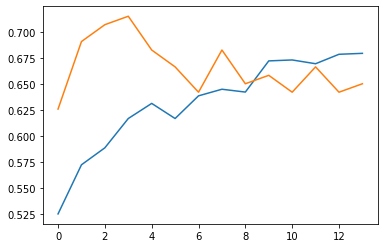

In [72]:
fit_model(X_train,y_train_cata,X_test,y_test_cata,adam)

## 베이지안 최적화

In [5]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11689 sha256=984db3c61c973454b5b37d87832caaa5959ad9dc65c1f371823f920efec4bd7b
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\fd\9b\71\f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [6]:
from bayes_opt import BayesianOptimization

In [7]:
#BaysianOptimization 객체생성
BO_lgb = BayesianOptimization(성능 평가를 수행할 함수, 테스트 수행을 위한 하이퍼 파라미터 Dic,random_state=0)

SyntaxError: invalid syntax (<ipython-input-7-7b327ceb6879>, line 2)

In [ ]:
#하이퍼 파라미터 dictionary
params={
    
}